In [2]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)

OpenCV: 4.13.0


In [4]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)

Image shape (H, W, C): (512, 512, 3) | dtype: uint8


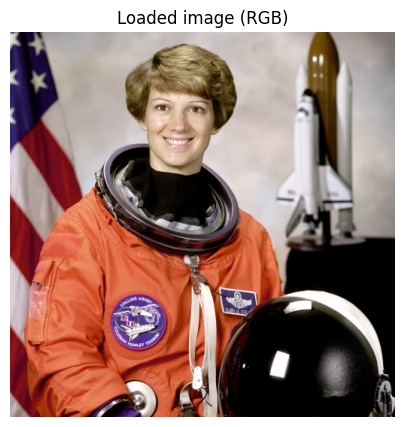

In [7]:
# TODO: set this to your image file name if you have one, e.g. "fruit basket.jpg"
IMAGE_PATH = None  # or "fruit basket.jpg"

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()

In [9]:
# TODO (Task 2.1): print two pixel values
h, w = img.shape[:2]

print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])


# TODO (Task 2.1) Answer:
# The pixel at (row=0, col=0) is the top-left pixel of the image.
# The center pixel is located at (h//2, w//2).
# In an RGB image, each pixel has three values representing the intensity of Red, Green, and Blue channels. Each value ranges from 0 to 255.


Top-left pixel: [154 147 151]
Center pixel: [19 14  7]


Reloaded shape: (512, 512, 3) | dtype: uint8
Same shape? True
Same dtype? True


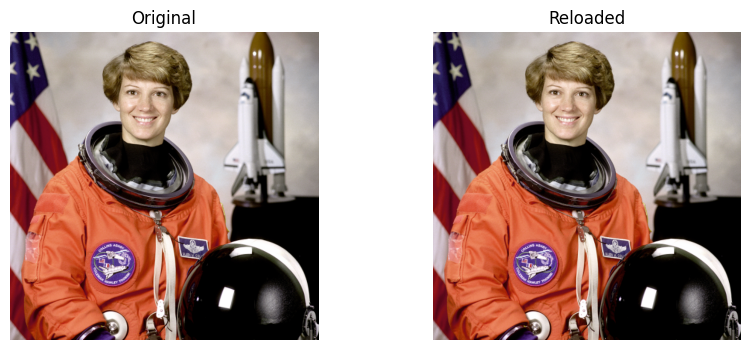

In [10]:
# TODO (Task 2.2): save and reload
import cv2

out_path = "output_saved.png"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

# Reload
reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)

# Optional: verify equality
print("Same shape?", img.shape == reloaded_rgb.shape)
print("Same dtype?", img.dtype == reloaded_rgb.dtype)

show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")


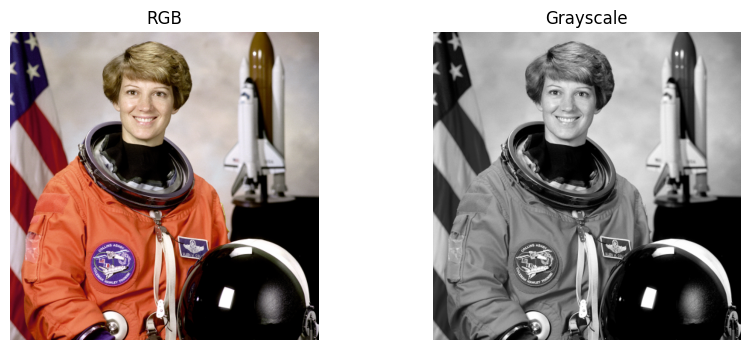

Gray shape: (512, 512) | dtype: uint8


In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")

print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


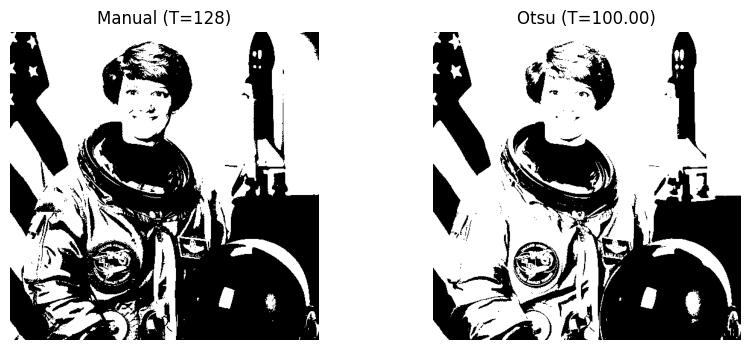

Otsu threshold chosen by OpenCV: 100.0


In [12]:
# Manual threshold
th_manual = 128
ret_manual, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

# Otsu threshold
ret_otsu, binary_otsu = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

show_side_by_side(
    binary_manual,
    binary_otsu,
    f"Manual (T={th_manual})",
    f"Otsu (T={ret_otsu:.2f})",
    cmap1="gray",
    cmap2="gray"
)

print("Otsu threshold chosen by OpenCV:", ret_otsu)


#Task 3.2 (Answer):
# The manual threshold uses a fixed value (128) to separate black and white pixels.
# Otsu’s method automatically computes an optimal threshold based on the image histogram.
# Otsu usually produces better separation when lighting conditions vary.

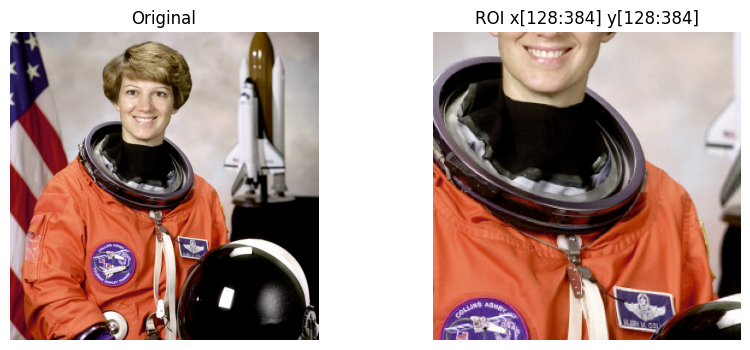

ROI shape: (256, 256, 3)


In [13]:
h, w = img.shape[:2]

x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()

show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)

# Task 4.2 (Answer):
# Images are stored as NumPy arrays in row-major order.
# The first index corresponds to the row (y coordinate), and the second index corresponds to the column (x coordinate).
# Therefore, image slicing uses img[y, x] and not img[x, y].

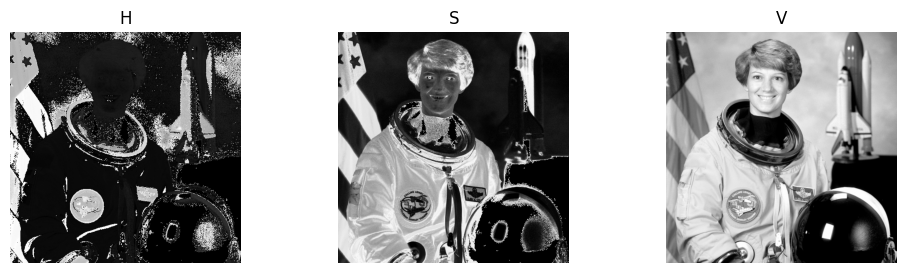

In [14]:
# TODO (Task 5.1): HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

H, S, V = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

plt.figure(figsize=(12, 3))
for i, (ch, name) in enumerate([(H, "H"), (S, "S"), (V, "V")], start=1):
    plt.subplot(1, 3, i)
    plt.imshow(ch, cmap="gray")
    plt.title(name)
    plt.axis("off")

plt.show()


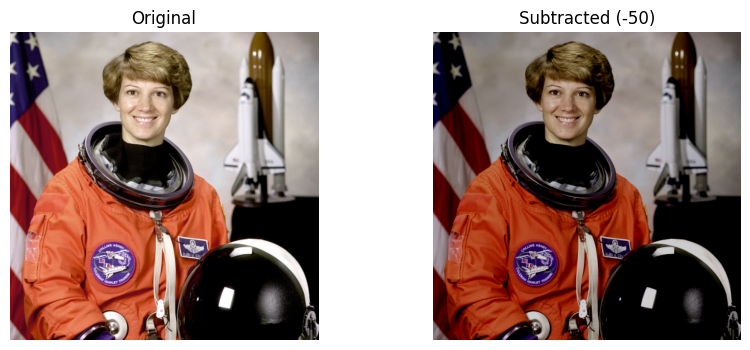

In [19]:
# Provided example (edit the constant and re-run)
sub_val = 50  # TODO: try 30, 100, 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")

# Task 6.1 (Answer):
# When sub_val is increased, more intensity is subtracted from each pixel, making the image progressively darker.
# The image gets darker because pixel intensity values decrease, and darker pixels correspond to lower brightness values.

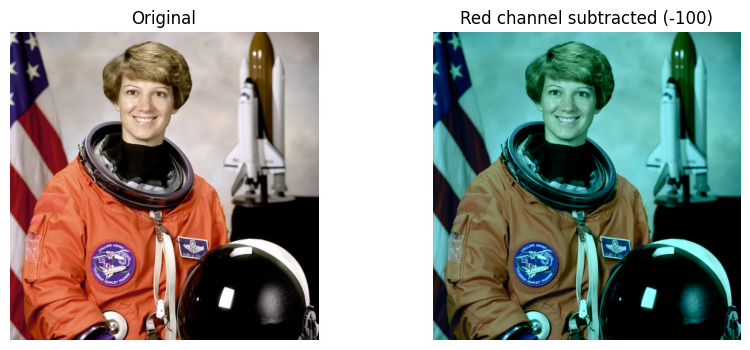

In [21]:
# TODO (Task 6.2): subtract from Red channel only
sub_val_r = 100

img_red_only = img.copy()
# RGB: channel 0=R, 1=G, 2=B
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")

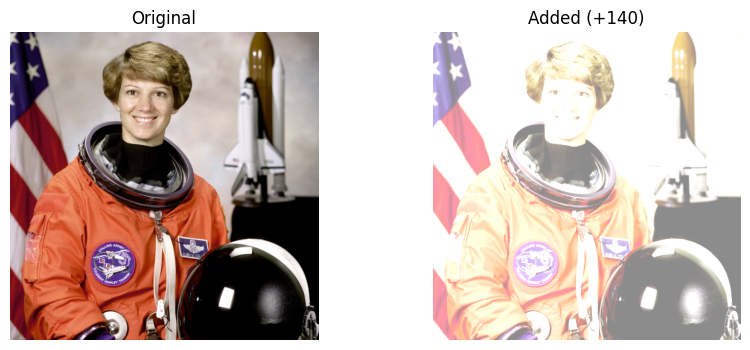

In [23]:
add_val = 140  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")

# Task 6.3 (Answer)
# When add_val is increased, the image becomes progressively brighter.
# This happens because adding a constant increases the pixel intensity values, and higher intensity values correspond to brighter pixels. Values exceeding 255 are clipped due to uint8 saturation.

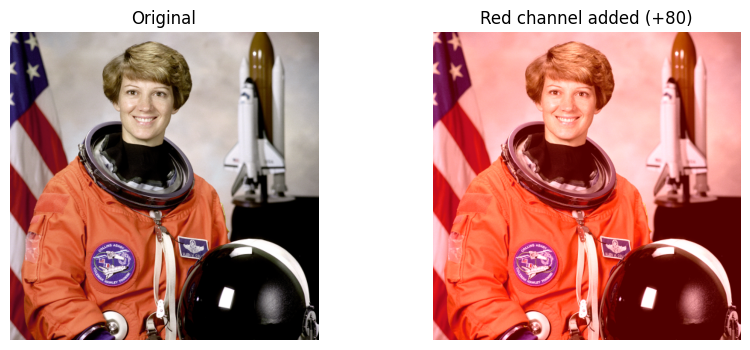

In [24]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")

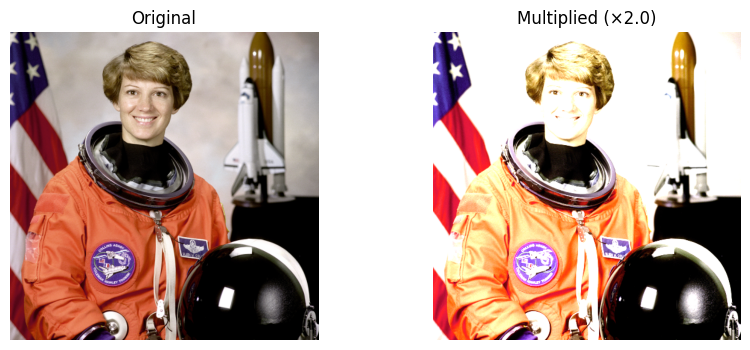

In [25]:
# TODO: try factors like 0.5, 1.2, 2.0
factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")

# Task 6.5 (Answer)
# Multiplying by a factor greater than 1 increases brightness and contrast by scaling pixel intensities upward, potentially causing saturation at 255.
# Multiplying by a factor less than 1 reduces pixel intensities, making the image darker and lowering contrast.

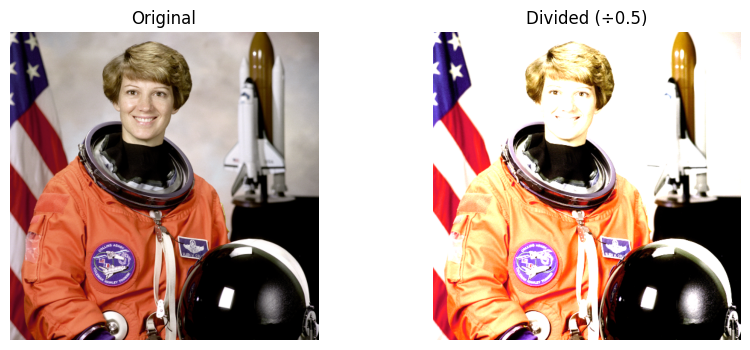

In [29]:
# TODO: try divisors like 2.0, 3.0, 0.5
divisor = 0.5
img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")

# Task 6.6 (Answer):
# Dividing by a number greater than 1 reduces pixel intensities, making the image darker.
# Dividing by a number less than 1 increases pixel intensities, making the image brighter and potentially causing saturation.